In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.MET import *
from model.MET_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/longtitude_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1783525/1783525 [00:01<00:00, 1201591.88it/s]


In [3]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num = []
MET_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    MET_Index = MET(epsilon)
    MET_Index.learn_index(data)
    MET_Index_seg_num.append(MET_Index.seg_num)
    MET_Index_mae.append(MET_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 41189/1783525 [00:00<00:04, 411888.43it/s]

11035 8.168360970549895


  2%|▏         | 43525/1783525 [00:00<00:03, 435247.30it/s]

4375 15.39034776636156


  3%|▎         | 45031/1783525 [00:00<00:03, 450308.28it/s]

2759 22.23517192077487


  3%|▎         | 45429/1783525 [00:00<00:03, 454283.93it/s]

2086 28.889287226139245


  3%|▎         | 45757/1783525 [00:00<00:03, 457568.25it/s]

1760 36.0763179658261


  3%|▎         | 45651/1783525 [00:00<00:03, 456508.26it/s]

1570 42.647292861047646


  3%|▎         | 45952/1783525 [00:00<00:03, 459516.06it/s]

1392 50.7866932058704


  3%|▎         | 45719/1783525 [00:00<00:03, 457188.26it/s]

1283 59.038497918448016


  3%|▎         | 44957/1783525 [00:00<00:03, 449561.85it/s]

1170 65.84683309737738


  3%|▎         | 45862/1783525 [00:00<00:03, 458616.06it/s]

1130 73.18922302743164


  3%|▎         | 45216/1783525 [00:00<00:03, 452156.12it/s]

1036 82.51474019147474


  3%|▎         | 45881/1783525 [00:00<00:03, 458802.78it/s]

997 91.1573350527747


  3%|▎         | 44918/1783525 [00:00<00:03, 449177.22it/s]

945 99.7004690150124


  3%|▎         | 45960/1783525 [00:00<00:03, 459599.34it/s]

902 106.8457162080711


100%|██████████| 1783525/1783525 [00:03<00:00, 484104.47it/s]

868 113.79541301635805


3.801156175384919

In [4]:
MET_Meta_Index_seg_num_withBound = []
MET_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_Meta_Index = MET_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    MET_Meta_Index.learn_index_lookahead(data,lookn=400)
    MET_Meta_Index_seg_num_withBound.append(MET_Meta_Index.seg_num)
    MET_Meta_Index_mae_withBound.append(MET_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  2%|▏         | 33222/1783525 [00:00<00:05, 332219.52it/s]

9211 8.706474537783322


  2%|▏         | 38742/1783525 [00:00<00:04, 387414.83it/s]

3710 15.714780560967746


  2%|▏         | 39797/1783525 [00:00<00:04, 397969.43it/s]

2461 22.508033809450385


  2%|▏         | 41100/1783525 [00:00<00:04, 410992.55it/s]

1922 29.244232629203402


  2%|▏         | 40555/1783525 [00:00<00:04, 405549.42it/s]

1684 36.25221962125566


  2%|▏         | 40877/1783525 [00:00<00:04, 408762.59it/s]

1511 43.471118150852945


  2%|▏         | 40926/1783525 [00:00<00:04, 409253.56it/s]

1405 48.83980263803423


  2%|▏         | 39876/1783525 [00:00<00:04, 398752.77it/s]

1295 57.82294669264518


  2%|▏         | 40282/1783525 [00:00<00:04, 402813.66it/s]

1205 65.84440924573528


  2%|▏         | 42182/1783525 [00:00<00:04, 421819.40it/s]

1113 72.24350205351762


  2%|▏         | 41279/1783525 [00:00<00:04, 412785.47it/s]

1049 81.12768590291698


  2%|▏         | 41638/1783525 [00:00<00:04, 416371.46it/s]

996 87.25370488218556


  2%|▏         | 42301/1783525 [00:00<00:04, 423009.39it/s]

946 96.39480523121347


  2%|▏         | 41936/1783525 [00:00<00:04, 419351.40it/s]

915 103.352795727562


100%|██████████| 1783525/1783525 [00:03<00:00, 458700.22it/s]

866 114.8117811637067


4.136715172231197

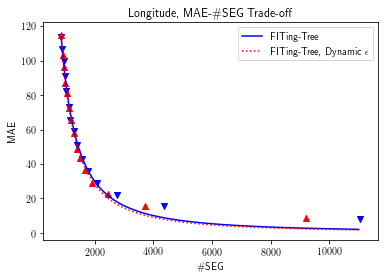

In [7]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('Longitude, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(860,11000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,MET_Index_seg_num,MET_Index_mae)
p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(MET_Index_seg_num, MET_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(MET_Meta_Index_seg_num_withBound, MET_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/Main_exp/Longitude_tradeoff_22"), bbox_inches='tight', pad_inches=0)

In [8]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2

(130148.03262256163, 121655.07036912379)

In [6]:
seg_err_list = np.array(MET_Index_mae)*data_len/np.array(MET_Index_seg_num)
MET_Random_Index_seg_num = []
MET_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    MET_Random_Index = MET_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    MET_Random_Index.learn_index_lookahead(data,lookn=400)
    MET_Random_Index_seg_num.append(MET_Random_Index.seg_num)
    MET_Random_Index_mae.append(MET_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  3%|▎         | 60520/1783525 [00:00<00:02, 605194.81it/s]

6126 9.583805665746205


  4%|▎         | 64862/1783525 [00:00<00:02, 648617.53it/s]

2184 31.09437210019484


  4%|▎         | 65650/1783525 [00:00<00:02, 656494.37it/s]

1456 50.85854753928316


  4%|▎         | 65968/1783525 [00:00<00:02, 659679.06it/s]

1100 72.80810978259346


  4%|▎         | 66069/1783525 [00:00<00:02, 659635.35it/s]

878 98.42962728304902


  4%|▎         | 66155/1783525 [00:00<00:02, 658866.03it/s]

749 114.88734780841311


100%|██████████| 1783525/1783525 [00:02<00:00, 734398.98it/s]

650 140.73121823355433


-1.1973011896014214

In [7]:
MET_Poly_Index_seg_num = []
MET_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_Poly_Index = MET_Poly(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    MET_Poly_Index.learn_index_lookahead(data,lookn=400)
    MET_Poly_Index_seg_num.append(MET_Poly_Index.seg_num)
    MET_Poly_Index_mae.append(MET_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  1%|          | 10511/1783525 [00:00<00:16, 105109.10it/s]

6566 6.405254201651225


  1%|          | 15869/1783525 [00:00<00:11, 158689.77it/s]

4240 10.199745447919149


  1%|          | 19076/1783525 [00:00<00:09, 190758.36it/s]

3358 13.390650537559047


  1%|          | 20618/1783525 [00:00<00:08, 206153.16it/s]

2935 15.7783720441261


  1%|▏         | 24073/1783525 [00:00<00:07, 238792.81it/s]

2670 17.955801012040762


  1%|▏         | 24998/1783525 [00:00<00:07, 248871.26it/s]

2335 20.997288515720275


  1%|▏         | 25531/1783525 [00:00<00:06, 254580.06it/s]

2211 22.346376978175243


  2%|▏         | 27436/1783525 [00:00<00:06, 272172.14it/s]

2077 24.200949243772865


  2%|▏         | 29376/1783525 [00:00<00:05, 293758.18it/s]

1987 25.443675866612466


  2%|▏         | 30202/1783525 [00:00<00:05, 299455.75it/s]

1847 27.977028076421693


  2%|▏         | 30993/1783525 [00:00<00:05, 309928.82it/s]

1806 28.774834667302112


  2%|▏         | 32688/1783525 [00:00<00:05, 325490.44it/s]

1752 29.853230540642826


  2%|▏         | 33664/1783525 [00:00<00:05, 336593.78it/s]

1671 31.73024600159796


  2%|▏         | 33991/1783525 [00:00<00:05, 337100.55it/s]

1632 32.924082925666866


100%|██████████| 1783525/1783525 [00:04<00:00, 422437.13it/s]

1598 33.60721828962308


-5.979995515445868

In [ ]:
MET_LS_Index_seg_num = []
MET_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_LS_Index = MET_LS(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    MET_LS_Index.learn_index_lookahead(data,lookn=400)
    MET_LS_Index_seg_num.append(MET_LS_Index.seg_num)
    MET_LS_Index_mae.append(MET_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

 52%|█████▏    | 928400/1783525 [04:29<06:40, 2135.15it/s]

In [ ]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(550,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,MET_Index_seg_num,MET_Index_mae)
p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,MET_Random_Index_seg_num,MET_Random_Index_mae)
p4,_ = curve_fit(func,MET_Poly_Index_seg_num,MET_Poly_Index_mae)
p5,_ = curve_fit(func,MET_LS_Index_seg_num,MET_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(MET_Index_seg_num, MET_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(MET_Meta_Index_seg_num_withBound, MET_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
plt.scatter(MET_Random_Index_seg_num, MET_Random_Index_mae,c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
plt.scatter(MET_Poly_Index_seg_num, MET_Poly_Index_mae,c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
plt.scatter(MET_LS_Index_seg_num, MET_LS_Index_mae,c=colors[4],marker=markers[4])
plt.legend()
#plt.savefig("{}.pdf".format("results/Main_exp/Longitude_tradeoff_22"), bbox_inches='tight', pad_inches=0)

In [ ]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC1,AUC2,AUC3,AUC4,AUC5